In [95]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import itertools

# import more_itertools as mit

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

In [56]:
num=np.array(range(1000)).astype(float)
factorial=np.zeros(1000).astype(float)
factorial[0]=1.0
for i in range(1,len(num)):
    factorial[i]=factorial[i-1]*num[i]
    
def factorial_f(n):
    return factorial[int(n)]

def binom(n,k):
    return factorial_f(n)/(factorial_f(n-k)*factorial_f(k))

# Задача 1

### Немного математики:

Перед тем, как кодить, необходимо найти по возможности руками вероятности:
    
Обозначим $P(n,k)$ - вероятность того, первый раз приехал повторный таксист на шаге $k$ при условии того, что всего $n$ таксистов.

Очевидно, что $k\in [2,n+1]$ так как со второй попытки может приехать тот же самый, а если всего $n$, то на $n+1$ приедет знакомый по принципу дирихле, если до этого все были разные.

$|\Omega|=n^k$ - всего вариантов как могут приехать таксисты. Дальше среди первых $k-1$ нет вовторений, то есть выбрать их $C_n^{k-1}$ и расстивить потом еще $(k-1)!$, и дальше может приехать один из $k-1$ для повторения.

Итого $P(n,k)=\frac{C_n^{k-1}(k-1)!(k-1)}{n^k}$, будем использовать это для дальнейших подсчетов (чтобы посчитать мат ожидание, нужно просто перемножить вектор из $n$ вероятностей на вектор $k=[2,...,n+1]$ и сложить все, при условии, что все вероятности преподсчиатны это не сложная операция)

In [142]:
# a)
def probab_p(n,k):
#     print(n,n-k+1,factorial_f(n-k+1)*n**k)
    answ=(k-1)/n**k
    for i in range(k-2+1):
        answ*=(n-i)
    return answ #, np.math.factorial(n)*(k-1)/(np.math.factorial(n-k+1)*n**k)
    
#     return np.math.factorial(n)*(k-1)/(np.math.factorial(n-k+1)*n**k)

probab_new = np.vectorize(probab_p)

In [143]:
x=np.array(range(9,1000))
y=probab_new(x,10)

Text(0, 0.5, 'Правдоподобие')

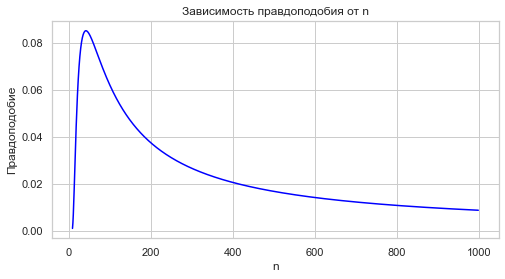

In [61]:
plt.plot(x,y,color='blue')
plt.title("Зависимость правдоподобия от n")
plt.xlabel("n")
plt.ylabel("Правдоподобие")

In [62]:
print(np.argmax(y)+9, ': n при котором веростность наблюдать данную ситуацию максимальная')

42 : n при котором веростность наблюдать данную ситуацию максимальная


In [59]:
#б)

In [63]:
# считаем матрицу вероятностей исходя из зависимостей P(n,k-1) и P(n,k)
n_all=10000
k_all=n_all+1
probas_matrics=np.zeros((n_all,k_all))
for n in tqdm(list(range(1,n_all))):
    probas_matrics[n,2]=probab_new(n,2)
    for k in range(3,n+2):
        probas_matrics[n,k]=probas_matrics[n,k-1]*(n-k+2)*(k-1)/((k-2)*n)

100%|██████████| 9999/9999 [01:08<00:00, 145.03it/s] 


In [64]:
def math_expect(n):
    init=np.array(range(1,n+2))
    
    return np.sum(init*probas_matrics[n,1:n+2])
    
#     return np.sum(init*probab_new(n,init))

math_expect_sp = np.vectorize(math_expect)

In [162]:
x=np.array(range(1,1000))
y_exp=math_expect_sp(x)

Text(0, 0.5, 'Математического ожидания шага первой повторной встречи')

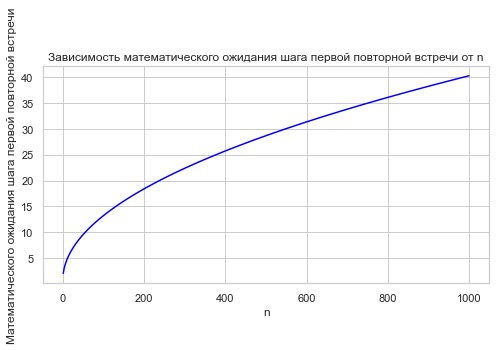

In [163]:
plt.plot(x,y_exp,color='blue')
plt.title("Зависимость математического ожидания шага первой повторной встречи от n")
plt.xlabel("n")
plt.ylabel("Математического ожидания шага первой повторной встречи")

In [164]:
print(np.argmin(np.abs(y_exp-10))+1, ': n при котором веростность наблюдать данную ситуацию максимальная')

55 : n при котором веростность наблюдать данную ситуацию максимальная


In [165]:
#в)
n=100
def simulate(n,size):
    np.random.seed(1000)
    
    arr=np.random.choice(np.array(range(1,n+2)), size=(1, size), replace=True, p =probas_matrics[n,1:n+2]  )
    
    return arr
    

In [166]:
# оцениваем с помощью двух методов
def mle_estimate(k):
    answer=np.zeros(len(k))
    
    for i in tqdm(range(len(k))):
        
        answer[i]=int(np.argmax(probas_matrics[:,k[i]])+(k[i]-1))
        
    return answer.astype(int)

def moment_estimate(k):
    answer=np.zeros(len(k))
    for i in tqdm(range(len(k))):
        answer[i]=np.argmin(np.abs(y_exp-k[i]))+1
    return answer


In [167]:
n=100
sim=simulate(n,10000)[0]

Text(0, 0.5, 'Количство наблюдений')

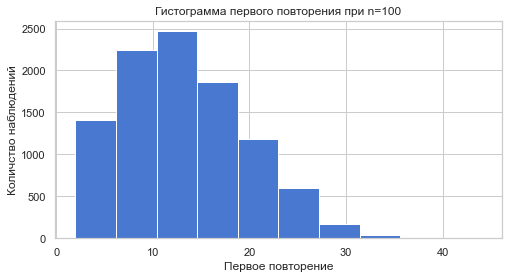

In [168]:
p=plt.hist(sim)
plt.title("Гистограмма первого повторения при n=100")
plt.xlabel("Первое повторение")
plt.ylabel("Количство наблюдений")

In [169]:
mle=mle_estimate(sim)

100%|██████████| 10000/10000 [00:01<00:00, 5185.23it/s]


Смещение:  9.1499
Дисперсия:  9899.422829989999
Среднеквадратичная ошибка:  9983.1435


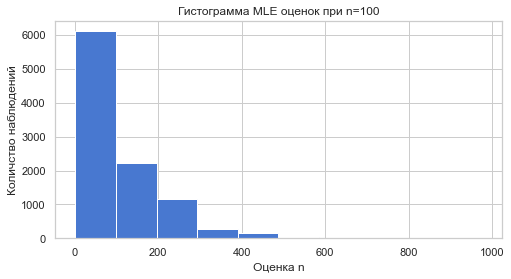

In [170]:
p=plt.hist(mle)
plt.title("Гистограмма MLE оценок при n=100")
plt.xlabel("Оценка n")
plt.ylabel("Количство наблюдений")

print('Смещение: ',np.mean(mle-100))
print('Дисперсия: ',np.std(mle)**2)
print('Среднеквадратичная ошибка: ',np.mean((mle-100)**2))

In [171]:
moment=moment_estimate(sim)

100%|██████████| 10000/10000 [00:00<00:00, 75724.49it/s]


Смещение:  26.3144
Дисперсия:  14430.338152639999
Среднеквадратичная ошибка:  15122.7858


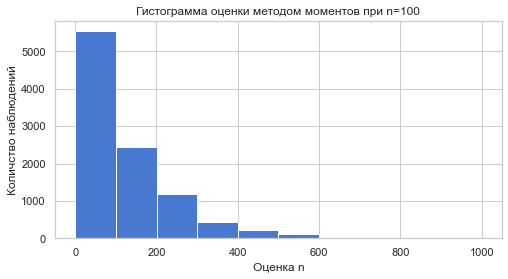

In [172]:
p=plt.hist(moment)
plt.title("Гистограмма оценки методом моментов при n=100")
plt.xlabel("Оценка n")
plt.ylabel("Количство наблюдений")

print('Смещение: ',np.mean(moment-100))
print('Дисперсия: ',np.std(moment)**2)
print('Среднеквадратичная ошибка: ',np.mean((moment-100)**2))

# Задача 2

### Немного математики:

Перед тем, как кодить, необходимо найти по возможности руками вероятности:
    
Обозначим $P(n,k)$ - вероятность того, среди первых $n$ таксистов приехало $k$ разных: $k\in[1,...,10]$.

$|\Omega|=n^10$, дальше нужно выбрать $k$ таксистов, который встретятся из $n \rightarrow C_n^{k}$ и дальше нужно найти количество способов расставить $k$ чисел по 10 местам, так чтобы каждого было минимум по 1. 

Пусть мы нашли частоты все $k$ чисел ($n_1,...,n_k$), тогда как известно расставить их на 10 мест можно $\frac{10!}{n_1!...n_k!}$ способавим. Осталось для каждого способа разбиения 10 чисел на $k$ не пустых корзин посчитать это количество (это делает функция fill_razmesh, которая для каждой комбинации считает расстановки и все складывает). Это нужно посчитать один раз так как от $n$ данное количество не зависит. (Обзовем это $M(k)$)

Итого вероятность $P(n,k)=\frac{C_n^k M(k)}{n^10}$

In [100]:
def razmesh(arr):
    answ=factorial_f(10)
    for i in arr:
        answ/=factorial_f(i)
    return answ

def neclusters(l, K):
    for splits in itertools.combinations(range(len(l) - 1), K - 1):
        yield np.split(l, 1 + np.array(splits))
        
def all_combination_k_10(k):
    res=neclusters(list(range(1,11)),k)
    cur=0
    for i in res:
        cur+=1
    res=neclusters(list(range(1,11)),k)
    arr=np.zeros((cur,k))
    cur_1=0
    cur_2=0
    for i in res:
        for j in i:
    #         print(j)
            arr[cur_1,cur_2]=len(j)
            cur_2+=1
        cur_2=0
        cur_1+=1
        
    return arr

def fill_razmesh(k):
    arr=all_combination_k_10(k)
    answ=0
    for i in range(len(arr)):
        answ+=razmesh(arr[i])
        
    return answ

In [101]:
razmesh_k_10=list([0]*11)
for k in range(1,11):
    razmesh_k_10[k]=fill_razmesh(k) #*binom(10,k) /(10**10)

In [102]:
def propap_n_k(n,k):
    return razmesh_k_10[k]*binom(n,k)/(n**10)

propap_n_k_vec = np.vectorize(propap_n_k)

def math_exp_10(n):
    init=np.array(range(1,11))
    
    return np.sum(init*propap_n_k_vec(n,init))

math_exp_10_vec = np.vectorize(math_exp_10)

In [173]:
# проверяем, что вероятность суммируется в 1
np.sum(propap_n_k_vec(10,np.array(range(1,11))))

1.0

In [174]:
x=np.array(range(1,100))
y=propap_n_k_vec(x,6)

Text(0, 0.5, 'Правдоподобие')

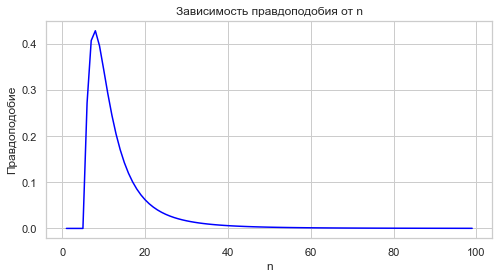

In [175]:
plt.plot(x,y,color='blue')
plt.title("Зависимость правдоподобия от n")
plt.xlabel("n")
plt.ylabel("Правдоподобие")

In [176]:
print(np.argmax(y)+1, ': n при котором веростность наблюдать данную ситуацию максимальная')

8 : n при котором веростность наблюдать данную ситуацию максимальная


In [177]:
x=np.array(range(1,101))
y_exp=math_exp_10_vec(x)

Text(0, 0.5, 'Математическое ожидание количества разных имен среди первых 10')

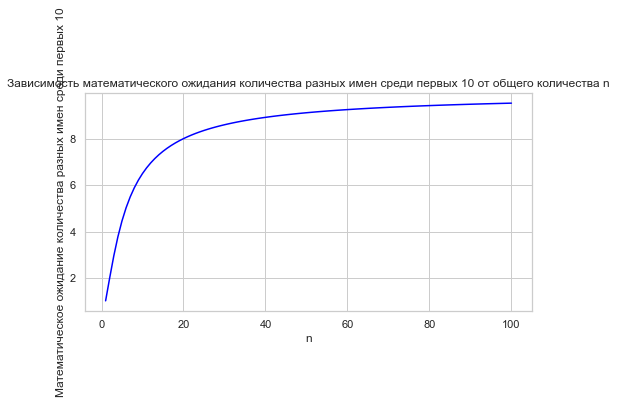

In [178]:
plt.plot(x,y_exp,color='blue')
plt.title("Зависимость математического ожидания количества разных имен среди первых 10 от общего количества n")
plt.xlabel("n")
plt.ylabel("Математическое ожидание количества разных имен среди первых 10")

In [179]:
print(np.argmin(np.abs(y_exp-6))+1, ': n при котором веростность наблюдать данную ситуацию максимальная')

8 : n при котором веростность наблюдать данную ситуацию максимальная


In [180]:
# ищем оценки параметра двумя способами
def simulate_2(size):
    np.random.seed(1000)
    arr=np.random.choice(np.array(range(1,21)), size=(10, size), replace=True, p =np.ones(20)/20  )
    return arr

def mle_est_2(k):
    answ=np.zeros(len(k))
    
    init=np.array(range(1,101))
    
    for i in range(len(k)):
        prob=propap_n_k_vec(init,k[i])
        answ[i]=np.argmax(prob)+1
        
    return answ

def moment_est_2(k):
#     init=np.array(range(1,101))
#     prob=math_exp_10(init,k)
    answ=np.zeros(len(k))
    
    for i in range(len(k)):

        answ[i]=np.argmin(np.abs(y_exp-k[i]))+1
        
    return answ


In [183]:
count=np.zeros(11)
arr_unique=np.zeros(10**4)
arr=simulate_2(10**4).T
for i in tqdm(range(10**4)):
    arr_unique[i]=len(np.unique(arr[i]))
    count[len(np.unique(arr[i]))]+=1

100%|██████████| 10000/10000 [00:00<00:00, 41603.39it/s]


In [186]:
p

(array([5.539e+03, 2.443e+03, 1.183e+03, 4.370e+02, 2.310e+02, 1.040e+02,
        3.100e+01, 2.000e+01, 8.000e+00, 4.000e+00]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4,
        899.2, 999. ]),
 <BarContainer object of 10 artists>)

Text(0, 0.5, 'Математическое ожидание количества разных имен среди первых 10')

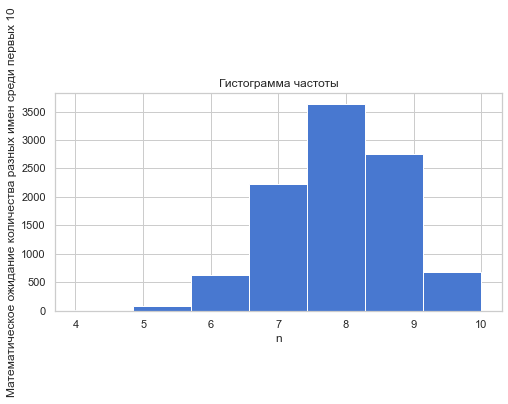

In [191]:
p=plt.hist(arr_unique,bins=7)
plt.title("Гистограмма количесто разных имен среди 10 приездов при n=20 ")
plt.xlabel("Количество разных имен среди 10")
plt.ylabel("Количество наблюдений")

In [192]:
mle_2=mle_est_2(arr_unique.astype(int))

Смещение:  8.5042
Дисперсия:  521.7311823599999
Среднеквадратичная ошибка:  594.0526


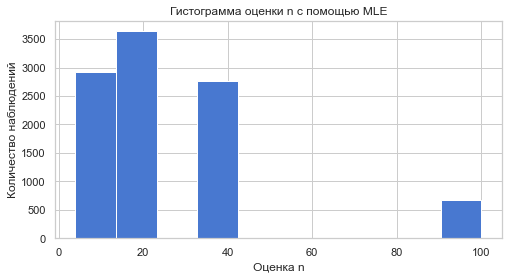

In [195]:
p=plt.hist(mle_2)
plt.title("Гистограмма оценки n с помощью MLE")
plt.xlabel("Оценка n")
plt.ylabel("Количество наблюдений")

print('Смещение: ',np.mean(mle_2-20))
print('Дисперсия: ',np.std(mle_2)**2)
print('Среднеквадратичная ошибка: ',np.mean((mle_2-20)**2))

In [196]:
moment_2=moment_est_2(arr_unique.astype(int))

Смещение:  8.8756
Дисперсия:  514.6949246400001
Среднеквадратичная ошибка:  593.4712


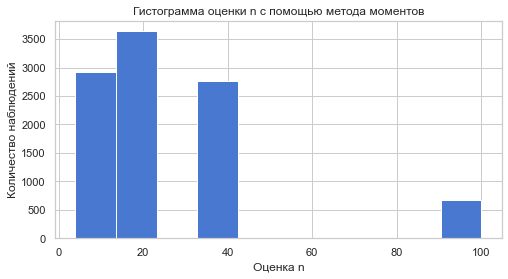

In [197]:
p=plt.hist(moment_2)
plt.title("Гистограмма оценки n с помощью метода моментов")
plt.xlabel("Оценка n")
plt.ylabel("Количество наблюдений")

print('Смещение: ',np.mean(moment_2-20))
print('Дисперсия: ',np.std(moment_2)**2)
print('Среднеквадратичная ошибка: ',np.mean((moment_2-20)**2))

# Задача 3

In [199]:
# асимптотическая оценка
def asyptotic(sample, I):
    mean=np.mean(sample)
    std=np.std(sample)
    
    return mean+sts.norm.isf(1-(1-I)/2)*std/np.sqrt(len(sample)), mean+sts.norm.isf((1-I)/2)*std/np.sqrt(len(sample))

# получение бутстрэповской выборки (функция с семинара)
def get_bootstrap_sample(x, B_sample=1):
    N = x.size 
    np.random.seed(1000)
    
    sample = np.random.choice(x, size=(N, B_sample), replace=True)
    
    if B_sample == 1:
        sample = sample.T[0]
    return sample

# получение оценки с помощью наивного бутстрэпа
def bootstrup(sample, I,m):

    sample_all=get_bootstrap_sample(sample,m)
    
    boot_mean=np.mean(sample_all,axis=0)
    
    return np.quantile(boot_mean, (1-I)/2), np.quantile(boot_mean, 1-(1-I)/2)

# получение оценки с помощью бутстрэпа t статистики
def t_bootstrup(sample,alpha=0.05):
    x_boot=get_bootstrap_sample(sample,10000)
    
    theta_hat = np.mean(sample)
    std_hat = np.std(sample)

    x_boot_t = np.mean(x_boot - theta_hat, axis=0)
    x_boot_t = x_boot_t/np.std(x_boot, axis=0)

    left = theta_hat - np.quantile(x_boot_t, 1-alpha/2)*std_hat
    right = theta_hat - np.quantile(x_boot_t, alpha/2)*std_hat
    return left, right


In [5]:
def func(x):
    return np.mean(x)

In [6]:
# а)
exp=sts.expon(scale=1)

In [7]:
# вероятность того, что асимптотический нормальный интервал накрывает истинное мат ожидание
k=0

for i in tqdm(range(10000)):
    np.random.seed(37*i+10)
    
    sample=exp.rvs(size=20)
    l,r=asyptotic(sample, 0.95)
#     print(l,r)
    if l<=1 and r>=1:
        k+=1
        
accuracy=k/10000

100%|██████████| 10000/10000 [00:06<00:00, 1509.50it/s]


In [8]:
print('С помощью классического асимптотического нормального интервала точность:',accuracy)

С помощью классического асимптотического нормального интервала точность: 0.902


In [9]:
# вероятность того, что наивный бутстрэп накрывает истинное мат ожидание
k=0

for i in tqdm(range(10000)):
    np.random.seed(37*i+10)
    
    sample=exp.rvs(size=20)
    l,r=bootstrup(sample, 0.95, 10000)
#     print(l,r)
    if l<=1 and r>=1:
        k+=1
        
accuracy_2=k/10000

100%|██████████| 10000/10000 [00:52<00:00, 192.22it/s]


In [10]:
print('С помощью наивного бутсрапа точность:',accuracy_2)

С помощью наивного бутсрапа точность: 0.9079


In [12]:
# вероятность того, что бутстрэп t-статистики накрывает истинное мат ожидание
k=0

for i in tqdm(range(10000)):
    np.random.seed(37*i+10)
    
    sample=exp.rvs(size=20)
    l,r=t_bootstrup(sample,0.05) #t_bootstrup(sample, 0.95, 1000)
#     print(l,r)
    if l<=1 and r>=1:
        k+=1
        
accuracy_3=k/10000

100%|██████████| 10000/10000 [01:08<00:00, 145.30it/s]


In [13]:
print('С помощью  бутстрэпа t-статистики точность:',accuracy_3)

С помощью  бутстрэпа t-статистики точность: 0.9507


In [17]:
# b)
t=sts.t(df=3)
print(t.moment(1))

0.0


In [18]:
# вероятность того, что асимптотический нормальный интервал накрывает истинное мат ожидание
k=0

for i in tqdm(range(10000)):
    np.random.seed(37*i+10)
    
    sample=t.rvs(size=20)
    l,r=asyptotic(sample, 0.95)
#     print(l,r)
    if l<=0 and r>=0:
        k+=1
        
accuracy=k/10000

100%|██████████| 10000/10000 [00:06<00:00, 1634.27it/s]


In [19]:
print('С помощью классического асимптотического нормального интервала точность:',accuracy)

С помощью классического асимптотического нормального интервала точность: 0.9394


In [20]:
# вероятность того, что наивный бутстрэп накрывает истинное мат ожидание
k=0

for i in tqdm(range(10000)):
    np.random.seed(37*i+10)
    
    sample=t.rvs(size=20)
    l,r=bootstrup(sample, 0.95, 10000)
#     print(l,r)
    if l<=0 and r>=0:
        k+=1
        
accuracy_2=k/10000

100%|██████████| 10000/10000 [00:56<00:00, 177.32it/s]


In [21]:
print('С помощью наивного бутсрапа точность:',accuracy_2)

С помощью наивного бутсрапа точность: 0.9226


In [22]:
# вероятность того, что бутстрэп t-статистики накрывает истинное мат ожидание
k=0

for i in tqdm(range(10000)):
    np.random.seed(37*i+10)
    
    sample=t.rvs(size=20)
    l,r=t_bootstrup(sample,0.05) #t_bootstrup(sample, 0.95, 1000)
#     print(l,r)
    if l<=0 and r>=0:
        k+=1
        
accuracy_3=k/10000

100%|██████████| 10000/10000 [01:10<00:00, 141.25it/s]


In [23]:
print('С помощью  бутстрэпа t-статистики точность:',accuracy_3)

С помощью  бутстрэпа t-статистики точность: 0.9274


# c) вывод:

a) В первом случае как можно видеть выше, асимптотический доверительный интвервал и наивный бутстрэп оказываются существенно хуже, чем заявленная точность так как экспоненциальное распределение не является симметричным и очень сдвино к нулю с наличием правого хвоста и это сильно смещает интервал, построенный с помощью первых двух методов. Метод бустрэпа t-статистики, как мы это обсуждали, борется с этой проблемой и результат получает лучше.

б) Во втором случае распределение Стьюдента с тремя степенями свободы является симметричным и очень близко к нормальному. Из-за этого первый метод, который предполагает явный вид распредлеения наблдений оказывается более точным, чем два бутстрэповских метода, которые не делю никаких предположений о природе данных, из-за чего их точность оказывается ниже первого метода и ниже заявленной точность, но при увеличении выборки они будут работать тоже хорошо.

# Задача 4

In [200]:
# читаем файл с оценками
df=pd.read_excel('marks.xlsx')

In [201]:
col=['lastnames']
for i in range(30):
    col.append(f'{i}')
df.columns=col

In [202]:
res=np.zeros(df.shape[0])
for i in range(30):
    res=res+np.array(df[f'{i}'])
df['result']=res

In [203]:
df=df[['lastnames','result']]

In [204]:
# проверяю, что моя оценка сошлась
df[df['lastnames']=='Москвина']

,lastnames,result
316,Москвина,19.0


In [205]:
# гласные буквы
s='аеёиоуыэюя'

In [206]:
def func(x):
    if x[0] in s.upper():
        return '1'
    else:
        return '0'
def func_len(x):
    return len(x)

In [207]:
df['group']=df['lastnames'].apply(func)
df['len']=df['lastnames'].apply(func_len)

In [208]:
x=np.array(df[df['group']=='1']['result'])
y=np.array(df[df['group']=='0']['result'])

In [209]:
# доверительный интервал по бутстрэповской выборке
def stat_intervals(boot, alpha=0.05):
    left = np.quantile(boot, alpha/2)
    right = np.quantile(boot, 1-alpha/2)
    return left, right

In [210]:
#a) Используйте тест Уэлча
sts.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-0.8525715345026459, pvalue=0.39706341598411865)

### a)
pvalue $=0.39706$

Вывод: на 5% уровне значимости гипотеза о том, что ожидаемые оценки по двум группам равны не отвергается

In [213]:
#b) Используйте наивный бутстрэп
x_boot = get_bootstrap_sample(x, B_sample=10**4)
x_boot = np.mean(x_boot, axis=0)

y_boot = get_bootstrap_sample(y, B_sample=10**4)
y_boot = np.mean(y_boot, axis=0)

In [221]:
# доверительный интервал
stat_intervals(x_boot - y_boot,alpha=0.05)

(-3.5887501809234323, 1.3620675929946449)

In [215]:
# без оптимизации ищем близкое значение по сетке
l=np.linspace(0.38,0.41,10000)
answer=np.zeros(len(l))
for j in range(len(l)):
    answer[j]=np.abs(stat_intervals(x_boot - y_boot,alpha=l[j])[1])
print(np.argmin(answer))


9813


In [216]:
# доверительный интервал, который касается 0 (pvalue)
stat_intervals(x_boot - y_boot,alpha=l[9813])

(-2.110869156173107, -2.5329280649108993e-06)

In [217]:
print('pvalue: ',l[9813])

pvalue:  0.4094419441944194


### b)
pvalue $=0.4094$

Вывод: на 5% уровне значимости гипотеза о том, что ожидаемые оценки по двум группам равны не отвергается

In [218]:
#c) Используйте бутстрэп t-статистики
def t_interval(alpha):
    theta_hat = np.mean(x)-np.mean(y)
    x_boot = get_bootstrap_sample(x, B_sample=10**4)
    y_boot = get_bootstrap_sample(y, B_sample=10**4)

    std_hat = np.sqrt(np.std(x)**2+np.std(y)**2)
    z_boot_std=np.sqrt(np.std(x_boot,axis=0)**2 + np.std(y_boot,axis=0)**2)

    z_boot_t = np.mean(x_boot, axis=0)-np.mean(y_boot, axis=0)-theta_hat
    z_boot_t = z_boot_t/z_boot_std

    left = theta_hat - np.quantile(z_boot_t, 1-alpha/2)*std_hat
    right = theta_hat - np.quantile(z_boot_t, alpha/2)*std_hat
    return left, right

In [222]:
# доверительный интервал
t_interval(0.05)

(-3.6375908018252834, 1.3848785635399525)

In [225]:
t_interval(0.39)

(-2.223212316306225, -0.0057772735390997365)

In [226]:
l=np.linspace(0.385,0.39,1000)
answer=np.zeros(len(l))
for j in range(len(l)):
    answer[j]=np.abs(t_interval(l[j])[1])
print(np.argmin(answer))

370


In [227]:
print('pvalue: ',l[370])

pvalue:  0.38685185185185184


### c)
pvalue $=0.3868$

Вывод: на 5% уровне значимости гипотеза о том, что ожидаемые оценки по двум группам равны не отвергается

In [228]:
# определяем статистику для перестановочного теста
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [229]:
#d)
sts.permutation_test((x, y), statistic, vectorized=True,n_resamples=10**4, alternative='two-sided')

PermutationTestResult(statistic=-1.0795339412360665, pvalue=0.38716128387161286, null_distribution=array([-1.19930525,  0.02236214,  0.74099001, ...,  2.3459256 ,
       -1.36698509, -0.21718049]))

### d)
pvalue $=0.387161$

Вывод: на 5% уровне значимости гипотеза о том, что ожидаемые оценки по двум группам равны не отвергается

# Задача 5

In [277]:
med=np.quantile(df['result'],0.5)
df['>med']=df['result']>med
df['>med']=df['>med'].astype(int)

In [278]:
def len_(x):
    return(len(x))

In [280]:
df.groupby(by=['group','>med']).agg(len_)

lastnames  result  len
group >med                        
0     0           159   159.0  159
      1           123   123.0  123
1     0            29    29.0   29
      1            20    20.0   20

In [281]:
X_glas=np.array(df[df['group']=="1"]['>med'])
X_soglas=np.array(df[df['group']=="0"]['>med'])

In [49]:
# по оси x - результат (первое меньше либо равно медиане, второе больше)
# по оси y - первая буква (снизу согласная, сверху гласная)
mat=np.array([[29,20],[159,123]])
mat

array([[ 29,  20],
       [159, 123]])

### Метод оценки

В пунктах ниже мы будем оценивать искомые параметры с помощью дельта-метода

найдем классическую штуку:

$(\hat{\rho}-\rho)\rightarrow N(0,\rho(1-\rho)\frac{1}{n})$

Тогда для функции $g=log$ будет выполнено слудующее $\Big(\frac{dlog(x)}{dx}=\frac{1}{x}\Big)$:

$(log(\hat{\rho})-log(\rho))\rightarrow N(0,\rho(1-\rho)[\frac{1}{\rho^2}]\frac{1}{n})=N(0,\frac{1-\rho}{\rho}\frac{1}{n})$

$log\Big(\frac{\hat{\rho_1}}{1-\hat{\rho_1}}\Big)-log\Big(\frac{\rho_1}{1-\rho_1}\Big) \rightarrow N(0,\rho(1-\rho)[\frac{dlog\Big(\frac{\rho_1}{1-\rho_1}\Big)}{d\rho}]^2\frac{1}{n})=N(0,\frac{1}{\rho(1-\rho)}\frac{1}{n})$

a)$(log\Big(\frac{\hat{\rho_1}/(1-\hat{\rho_1})}{\hat{\rho_2}/(1-\hat{\rho_2})}\Big)-log\Big(\frac{\rho_1/(1-\rho_1)}{\rho_2/(1-\rho_2)}\Big))=$

$$log\Big(\frac{\hat{\rho_1}}{1-\hat{\rho_1}}\Big)-log\Big(\frac{\rho_1}{1-\rho_1}\Big)-log\Big(\frac{\hat{\rho_2}}{1-\hat{\rho_2}}\Big)+log\Big(\frac{\rho_2}{1-\rho_2}\Big)=$$

$$=N(0,\frac{1}{\rho_1(1-\rho_1)}\frac{1}{n_1}+\frac{1}{\rho_2(1-\rho_2)}\frac{1}{n_2})$$

б) $(log\Big(\frac{\hat{\rho_1}}{\hat{\rho_2}}\Big)-log\Big(\frac{\rho_1}{\rho_2}\Big))=log(\hat{\rho_1})-log(\rho_1)-log(\hat{\rho_2})+log(\rho_2)=N(0,\frac{1-\rho_1}{\rho_1}\frac{1}{n_1}+\frac{1-\rho_1}{\rho_1}\frac{1}{n_1})$

In [265]:
# а)
pq1=mat[0,1]/(mat[0,0]) #написать хорошо для гласных шанс
pq2=mat[1,1]/(mat[1,0]) #написать хорошо для согласных шанс

p1=mat[0,1]/(mat[0,0]+mat[0,1]) #написать хорошо для гласных
p2=mat[1,1]/(mat[1,0]+mat[1,1]) #написать хорошо для согласных

pq=pq1/pq2
print(pq)

0.8915054667788057


Как мы показали выше, для $\hat{\rho}=\frac{p_1/q_1}{p_2/q_2}$ с помощью дельта метода получается, что 

$$Var(log(\hat{\rho})) = \frac{1}{\rho_1(1-\rho_1)}\frac{1}{n_1}+\frac{1}{\rho_2(1-\rho_2)}\frac{1}{n_2}$$

Получается, что $I=[log(\hat{\rho})-1.96SE(log(\hat{\rho}))),log(\hat{\rho})+1.96SE(log(\hat{\rho}))]$

При возведении в экспоненту, так как эта функция нонотонная получаем:

$$I=[\hat{\rho}e^{-1.96SE(log(\hat{\rho})},\hat{\rho}e^{1.96SE(log(\hat{\rho})}]$$

Осталось только подставить числа из нашей матрицы!

In [266]:
SE_log=np.sqrt(1/(p1*(1-p1)*(mat[0,0]+mat[0,1]))  +   1/(p2*(1-p2)*(mat[1,0]+mat[1,1]))  )
left=r*np.exp(-1.96*SE_log)
right=r*np.exp(1.96*SE_log)
print('асимптотический 95% доверительный интервал для отношения шансов',left,right)

асимптотический 95% доверительный интервал для отношения шансов 0.5052206257280712 1.7333040533880726


In [268]:
#б)
p1=mat[0,1]/(mat[0,0]+mat[0,1]) #написать хорошо для гласных
p2=mat[1,1]/(mat[1,0]+mat[1,1]) #написать хорошо для согласных
r=p1/p2
print(r)

0.9357889497262319


Как известно, для $\hat{\rho}=\frac{x_1/n_1}{x_2/n_2}$ с помощью дельта метода получается, что (это мы показали выше)

$$Var(log(\hat{\rho})) = \frac{1}{x_1}-\frac{1}{n_1}+\frac{1}{x_2}-\frac{1}{n_2}$$

Получается, что $I=[log(\hat{\rho})-1.96SE(log(\hat{\rho}))),log(\hat{\rho})+1.96SE(log(\hat{\rho}))]$

При возведении в экспоненту, так как эта функция нонотонная получаем:

$$I=[\hat{\rho}e^{-1.96SE(log(\hat{\rho})},\hat{\rho}e^{1.96SE(log(\hat{\rho})}]$$

Осталось только подставить числа из нашей матрицы!

In [269]:
SE_log=np.sqrt(1/mat[0,1]-1/(mat[0,0]+mat[0,1])+1/mat[1,1]-1/(mat[1,0]+mat[1,1]))
left=r*np.exp(-1.96*SE_log)
right=r*np.exp(1.96*SE_log)
print('асимптотический 95% доверительный интервал для отношения вероятностей',left,right)

асимптотический 95% доверительный интервал для отношения вероятностей 0.6513522531798865 1.3444352946574951


In [283]:
# в)
X_glas_boot=get_bootstrap_sample(X_glas,10**4)
X_glas_boot=np.mean(X_glas_boot,axis=0)
X_soglas_boot=get_bootstrap_sample(X_soglas,10**4)
X_soglas_boot=np.mean(X_soglas_boot,axis=0)

In [288]:
#доверительный интервал наивного бутстрапа
stat_intervals(X_glas_boot*(1-X_soglas_boot)/((1-X_glas_boot)*X_soglas_boot),0.05)

(0.4610687022900763, 1.6415879017013237)

In [299]:
# без оптимизации ищем близкое значение по сетке
l=np.linspace(0.6,0.75,1000)
answer=np.zeros(len(l))
for j in range(len(l)):
    answer[j]=np.abs(stat_intervals(X_glas_boot*(1-X_soglas_boot)/((1-X_glas_boot)*X_soglas_boot),l[j])[1]-1)
print(np.argmin(answer))

755


In [300]:
# доверительный интервал, который касается крайнего значения в 1
stat_intervals(X_glas_boot*(1-X_soglas_boot)/((1-X_glas_boot)*X_soglas_boot),l[755])

(0.794946038431166, 1.0000105468802774)

In [301]:
print('pvalue: ',l[755])

pvalue:  0.7133633633633634


### Вывод
На $5\%$ уровне значимости гипотеза о том, что отношение шансов хорошо написать экзамен 'несогласных' к 'согласным' равно единице не отвергается. Pvalue полученно, с помощью наивного бутстрапа равно $0.7133$

# Задача 6

In [250]:
df

,lastnames,result,group,len
0,Ролдугина,0.0,0,9
1,Сафина,19.0,0,6
2,Сидоров,26.0,0,7
3,Солоухин,21.0,0,8
4,Старощук,22.0,0,8
...,...,...,...,...
326,Сенников,19.0,0,8
327,Ся,0.0,0,2
328,Сятова,0.0,0,6
329,Темиркулов,0.0,0,10


### Оценка методом моментов
У нас есть $Y_i$ и $X_i$ и мы хотим оценить $Y_i=\beta X_i+e_i$, для этого нужно использовать GMM с некоторой функцией $g$, то есть $e_i=Y_i-\beta X_i$ и мы хотим выбрать некоторую функцию $g$ и решить задачу $\mathbb{E}(g(e)) \rightarrow min$

Можно, например выбрать $g(x)=x^2$, то есть минимизировать второй момент отклонений, в этом случае задача решается следующим образом, заменяя на выборочный второй момент:

$$\sum_{i=1}^n (y_i-\beta x_i)^2 \rightarrow min$$

Возьмем производную по целевой переменной (задача выпуклая вниз, по этому решение будет глобальным минимум)

$$\sum_{i=1}^n -2x_i(y_i-\beta x_i)=0 \rightarrow \hat{\beta}=\frac{\bar{xy}}{\bar{x^2}}$$

In [253]:
# оценка параметра моментом
print('Оценка b с помощью второго момента:',np.mean(Y*X)/np.mean(X**2))

Оценка b с помощью второго момента: 1.9654066118008091


In [252]:
# проверим, что это согласуется с оценокй линейной регрессии
from sklearn.linear_model import LinearRegression

In [249]:
lin_reg=LinearRegression(fit_intercept=False)
lin_reg.fit(X,Y)
print(lin_reg.coef_[0])
# как видно оценка сходится с точной формулой

[1.96540661]


In [255]:
x=X[:,0]
y=Y[:,0]
print('Выборочная корреляция: ',np.corrcoef(x,y)[0][1])

Выборочная корреляция:  0.025393124976339342


Text(0, 0.5, 'Оценка')

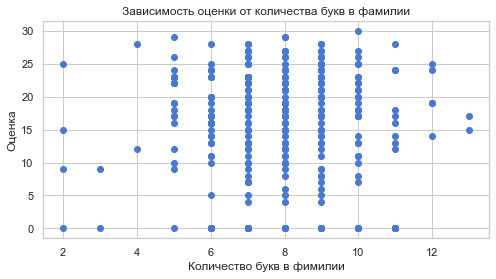

In [257]:
p=plt.scatter(x,y)
plt.title("Зависимость оценки от количества букв в фамилии")
plt.xlabel("Количество букв в фимилии")
plt.ylabel("Оценка")

In [258]:
# б)
def correlaction(x, y, axis):
    cov=np.mean( (x-np.mean(x))*(y-np.mean(y)) ,axis=axis)
    corr=cov/(np.std(x,axis=axis)*np.std(y,axis=axis))
    return corr

In [263]:
sts.permutation_test((x, y), correlaction, vectorized=True,n_resamples=10**4, alternative='two-sided')

PermutationTestResult(statistic=0.025393124976339342, pvalue=0.6281371862813718, null_distribution=array([ 0.10770335, -0.00846994, -0.02018168, ...,  0.04280496,
       -0.05896028,  0.02222631]))

### Вывод:
как видим pvalue $=0.628$ при тестировании гипотезы о том, что корреляция равна нулю, а значит гипотеза о равенстве корреляции не отвергается на всех разумных уровнях значимости.

# Задача 7

Задача номер 1 из дз по теории вероятности:

<a href="https://imgbb.com/"><img src="https://i.ibb.co/zHZYKX4/1-gpt.jpg" alt="1-gpt" border="0" /></a>
<!-- <a href="https://ibb.co/sJqGLKV"><img src="https://i.ibb.co/sJqGLKV/1-gpt.jpg" alt="1-gpt" border="0" /></a> -->

<a href="https://imgbb.com/"><img src="https://i.ibb.co/HVSPQYk/2-gpt.jpg" alt="2-gpt" border="0" /></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/Yd2zg58/3-gpt.jpg" alt="3-gpt" border="0" /></a>

GPT проигнорировал информацию, что распределение внутри круга, а не просто на прямой и выдал неверный ответ, попытаемся еще раз ему объяснить

<a href="https://imgbb.com/"><img src="https://i.ibb.co/X2dR66v/4-gpt.jpg" alt="4-gpt" border="0" /></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/DtftkXf/5-gpt.jpg" alt="5-gpt" border="0" /></a>

GPT понял, что распределение внутри круга, но применил довольно странные формулы и получил неверные ответы, подскажем ему, что сначала нужно посчитать функцию плотности расстояния до центра

<a href="https://imgbb.com/"><img src="https://i.ibb.co/zFzTHCK/6-gpt.jpg" alt="6-gpt" border="0" /></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/hBKk7rV/7-gpt.jpg" alt="7-gpt" border="0" /></a>

Функция плотности посчитана верно и осталось технически досчитать математическое ожиание и дисперсию, с которыми он легко справил!

<a href="https://imgbb.com/"><img src="https://i.ibb.co/17BHfpr/8-gpt.jpg" alt="8-gpt" border="0" /></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/BVP67fD/9-gpt.jpg" alt="9-gpt" border="0" /></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/7SQWqN7/10-gpt.jpg" alt="10-gpt" border="0" /></a>

# Задача 8

Курс по прикладной статистике от csc:
https://www.youtube.com/playlist?list=PLlb7e2G7aSpRIiB5S5ld-3nxxVAH5cyAc

С чем помог разобраться
1. Помог разобраться с дельта методом в построении доверительных интервалов
2. Еще показан интересный, но очень громоздкий метод улучшения проблемы несимметричности распредления в бутстрэповской выборке, такой как BCa интервал. 
3. Также очень познавательная леция-11 про подвохи при проверке гипотиз, очень полезно было послее ее прослушивания думать над каждым полученным результатом, согласуется ли он с логикой и что могло пойти не так в примененном методе. Одна из проблем продемонстрирована в задаче 3, где не всегда $95\%$ доверительный интервал означает, что уровень значимости в реальности $5\%$